# Hate Speech Classification

Hate speech is defined by the Cambridge Dictionary as "public speech that expresses hate or encourages violence towards a person or group based on something such as race, religion, sex, or sexual orientation".

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ty0yg_uf
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ty0yg_uf
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=0e77be59c4d18ee0b9be11617f4e0ad378582e8a848c1cd7c2b9ed5bfd017047
  Stored in directory: /tmp/pip-ephem-wheel-cache-pjxt1h91/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
#!pip install spacy

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import preprocess_kgptalkie as ps

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv', index_col = 0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
#0 - hate speech | 1 - offensive language | 2 - neither

In [ ]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
vc = df['class'].value_counts()
index = list(vc.index)
count = min(vc.values)

In [ ]:
count, index

(1430, [1, 2, 0])

Same amount of sample 

In [ ]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  df_bal = df_bal.append(temp, ignore_index = True)

In [ ]:
df = df_bal.copy()

In [ ]:
df['class'].value_counts()

2    1430
1    1430
0    1430
Name: class, dtype: int64

### Preprocessing

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
x = 'iiii llloooooovvvveeee_#@youuuuuuu'

In [ ]:
get_clean(x)

'i love you'

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [ ]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,3,0,1,bytch was an infant mister jsmart24 how the he...
1,3,1,2,0,1,be mean or rude to my little sister again and ...
2,3,0,3,0,1,goosemon420er you were there bitch laughing ou...
3,3,0,3,0,1,this hangover a bitch
4,3,0,3,0,1,women use niggas all the time for monetary pur...


### Text Tokenization

In [ ]:
text = df['tweet'].tolist()

In [ ]:
text[:2]

['bytch was an infant mister jsmart24 how the hell this bitch 18 talking about how much she remember about pac before he died',
 'be mean or rude to my little sister again and i will kick your ass it applies to all of you little snooty bitches k thanks']

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
# help(token)

In [ ]:
len(token.word_counts)

11705

In [ ]:
print(token.index_word)

{1: 'a', 2: 'i', 3: 'the', 4: 'retweet', 5: 'you', 6: 'to', 7: 'is', 8: 'bitch', 9: 'and', 10: 'not', 11: 'my', 12: 'that', 13: 'in', 14: 'of', 15: 'it', 16: 'like', 17: 'me', 18: 'be', 19: 'on', 20: 'trash', 21: 'this', 22: 'am', 23: 'for', 24: 'do', 25: 'out', 26: 'ass', 27: 'your', 28: 'are', 29: 'bitches', 30: 'with', 31: 'they', 32: 'all', 33: 'just', 34: 'so', 35: 'up', 36: 'nigga', 37: 'was', 38: 'fuck', 39: 'have', 40: 'if', 41: 'he', 42: 'but', 43: 'hoes', 44: 'faggot', 45: 'pussy', 46: 'hoe', 47: 'get', 48: 'about', 49: 'no', 50: 'at', 51: 'these', 52: 'what', 53: 'laughing', 54: 'loud', 55: 'got', 56: 'when', 57: 'fucking', 58: 'she', 59: 'white', 60: 'can', 61: 'off', 62: 'we', 63: 'shit', 64: 'niggas', 65: 'will', 66: 'as', 67: 'how', 68: 'or', 69: 'them', 70: 'nigger', 71: 'who', 72: 'know', 73: 'people', 74: 'some', 75: 'now', 76: 'one', 77: 'her', 78: 'from', 79: 'go', 80: 'bird', 81: 'his', 82: 'youre', 83: 'then', 84: 'would', 85: 'an', 86: 'man', 87: 'love', 88: 'yal

In [ ]:
x = ['i love you']

In [ ]:
token.texts_to_sequences(x)

[[2, 87, 5]]

In [ ]:
vocab_size = len(token.word_counts) + 1

In [ ]:
encoded_text = token.texts_to_sequences(text)

In [ ]:
print(encoded_text)
print(len(encoded_text))

[[3801, 37, 85, 2296, 721, 3802, 67, 3, 455, 21, 8, 1667, 156, 48, 67, 250, 58, 367, 48, 2297, 174, 41, 603], [18, 244, 68, 651, 6, 11, 165, 1668, 368, 9, 2, 65, 652, 27, 26, 15, 3803, 6, 32, 14, 5, 165, 3804, 29, 604, 284], [3805, 5, 150, 101, 8, 53, 25, 54], [21, 3806, 1, 8], [294, 274, 64, 32, 3, 104, 23, 3807, 2298, 9, 1669, 40, 1, 8, 178, 256, 17, 74, 2299, 2, 22, 10, 2300, 63, 147], [1090, 3808, 555, 1322, 1670, 7, 3, 63, 2, 268, 55, 11, 229, 456, 61, 12, 8], [2301, 3809, 7, 246, 1, 45, 41, 556, 6, 802, 35, 9, 605, 41, 7, 10, 1, 3810, 185, 123], [3811, 2, 24, 10, 16, 1, 130, 653], [92, 38, 30, 49, 29, 33, 92, 24, 15], [4, 3812, 3813, 208, 30, 106, 45, 28, 1671, 110, 2302, 148, 1, 557], [3814, 149, 1323, 29, 3815, 13, 3816, 3817, 722, 223, 432, 40, 77, 606, 37, 1091, 15, 295, 18, 1092, 66, 1, 916], [3818, 34, 369, 3819, 2, 3820, 63, 607, 1324, 723, 63, 139, 724, 8, 140, 17, 224, 384, 94, 608, 26, 35], [1672, 1325, 264, 8], [3821, 2, 55, 27, 1326, 26, 19, 11, 1673, 45], [2, 55, 558

In [ ]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding = 'post')

In [ ]:
print(X)

[[ 3801    37    85 ...     0     0     0]
 [   18   244    68 ...     0     0     0]
 [ 3805     5   150 ...     0     0     0]
 ...
 [   12    37    11 ...     0     0     0]
 [ 2251   152    11 ...     0     0     0]
 [    4 11704    19 ...     0     0     0]]


In [ ]:
X.shape

(4290, 120)

### Model Building

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
y = df['class']

In [ ]:
y.value_counts()

2    1430
1    1430
0    1430
Name: class, dtype: int64

In [ ]:
y = np_utils.to_categorical(df['class'])

In [ ]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape,y_train.shape

((3432, 120), (3432, 3))

In [ ]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 300)          3511800   
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 32)           19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 59, 32)            1056      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [ ]:
model.fit(X_train, y_train, epochs = 2, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/2
108/108 [==============================] - 12s 39ms/step - loss: 1.0460 - accuracy: 0.4799 - val_loss: 0.6679 - val_accuracy: 0.7622
Epoch 2/2
108/108 [==============================] - 4s 34ms/step - loss: 0.5476 - accuracy: 0.8023 - val_loss: 0.5269 - val_accuracy: 0.7995


### Model Testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26027c438>)

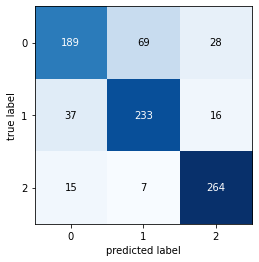

In [ ]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred))


In [ ]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       286
           1       0.75      0.81      0.78       286
           2       0.86      0.92      0.89       286

    accuracy                           0.80       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.80      0.80      0.80       858



### Testing with Custom Data

In [ ]:
x = 'hey bitch whass up'

In [ ]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x

In [ ]:
get_encoded(x)

array([[ 340,    8, 4930,   35,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [ ]:
np.argmax(model.predict(get_encoded(x)), axis=-1)

array([1])

In [ ]:
model.save('model_hate_speech.h5',)

In [ ]:
import pickle

In [ ]:
pickle.dump(token, open('token.pkl', 'wb'))